In [1]:
import cv2 as cv
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(columns = ['images', 'label'])
train_path = './raw data/asl_dataset/'
folders = glob(train_path+'/*')
print(folders)
noclasses = len(folders)
print(noclasses)

['./raw data/asl_dataset\\0', './raw data/asl_dataset\\1', './raw data/asl_dataset\\2', './raw data/asl_dataset\\3', './raw data/asl_dataset\\4', './raw data/asl_dataset\\5', './raw data/asl_dataset\\6', './raw data/asl_dataset\\7', './raw data/asl_dataset\\8', './raw data/asl_dataset\\9', './raw data/asl_dataset\\a', './raw data/asl_dataset\\b', './raw data/asl_dataset\\c', './raw data/asl_dataset\\d', './raw data/asl_dataset\\e', './raw data/asl_dataset\\f', './raw data/asl_dataset\\g', './raw data/asl_dataset\\h', './raw data/asl_dataset\\i', './raw data/asl_dataset\\j', './raw data/asl_dataset\\k', './raw data/asl_dataset\\l', './raw data/asl_dataset\\m', './raw data/asl_dataset\\n', './raw data/asl_dataset\\o', './raw data/asl_dataset\\p', './raw data/asl_dataset\\q', './raw data/asl_dataset\\r', './raw data/asl_dataset\\s', './raw data/asl_dataset\\t', './raw data/asl_dataset\\u', './raw data/asl_dataset\\v', './raw data/asl_dataset\\w', './raw data/asl_dataset\\x', './raw data/a

In [55]:
for path in folders:
    img_path = glob(path+'/*')
    _,label = os.path.split(path)
    files = os.listdir(path)
    for filename in files:
        im = cv.imread(path+'/'+filename)
        data = {'images':im,
                'label':label}
        df.append(data, ignore_index = True)

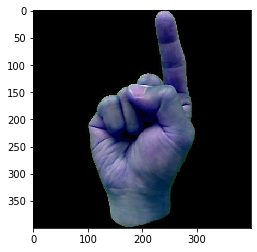

In [56]:
plt.imshow(data['images'])

In [57]:
df.shape

(0, 2)

In [2]:
from keras.preprocessing.image import ImageDataGenerator
batch_size=256
datagen = ImageDataGenerator(#rescale=1.0/255, 
                             #shear_range=0.2, 
                             #zoom_range=0.2, 
                             #horizontal_flip=True,
                             validation_split=0.3)
train_generator = datagen.flow_from_directory(train_path, 
                                              shuffle=True,
                                              target_size = (50,50),
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              subset='training') # set as training data

train_generator.class_indices

Using TensorFlow backend.


Found 1761 images belonging to 36 classes.


{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'a': 10,
 'b': 11,
 'c': 12,
 'd': 13,
 'e': 14,
 'f': 15,
 'g': 16,
 'h': 17,
 'i': 18,
 'j': 19,
 'k': 20,
 'l': 21,
 'm': 22,
 'n': 23,
 'o': 24,
 'p': 25,
 'q': 26,
 'r': 27,
 's': 28,
 't': 29,
 'u': 30,
 'v': 31,
 'w': 32,
 'x': 33,
 'y': 34,
 'z': 35}

In [3]:
test_generator = datagen.flow_from_directory(train_path, 
                                             shuffle=False,
                                             target_size = (50,50),
                                             batch_size = batch_size,
                                             class_mode = 'categorical',
                                             subset='validation') # set as validation data

Found 754 images belonging to 36 classes.


(-0.5, 49.5, 49.5, -0.5)

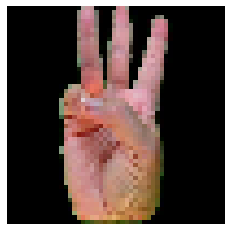

In [4]:
i=0
t_x, t_y = train_generator.__getitem__(i)
# plot image
plt.imshow(t_x[i].astype('uint8'))
plt.axis('off')

In [23]:
model = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(29, activation='softmax')
  ])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_19/Conv2D' (op: 'Conv2D') with input shapes: [?,1,1,64], [3,3,64,128].

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
input_shape=(50,50,3)

model = tf.keras.Sequential(
  [
      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3),input_shape=input_shape ,filters=32, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      tf.keras.layers.Conv2D(kernel_size=(1,1), input_shape=input_shape,filters=64, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      #tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
      
      #tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=input_shape,filters=128, activation='relu'),
      #tf.keras.layers.MaxPool2D(pool_size=(2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(rate=0.5),
      tf.keras.layers.Dense(36, activation='softmax')
  ])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 64)         

In [26]:
from keras.callbacks import EarlyStopping 


early_stop = EarlyStopping(monitor='loss', patience=2)

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data=test_generator)

Train for 7 steps, validate for 3 steps
Epoch 1/100
7/7 [==============================] - 12s 2s/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.4685 - val_accuracy: 0.8700
Epoch 2/100
7/7 [==============================] - 12s 2s/step - loss: 0.0512 - accuracy: 0.9864 - val_loss: 0.5167 - val_accuracy: 0.8568
Epoch 3/100
7/7 [==============================] - 12s 2s/step - loss: 0.1107 - accuracy: 0.9637 - val_loss: 0.5579 - val_accuracy: 0.8448
Epoch 4/100
7/7 [==============================] - 12s 2s/step - loss: 0.0850 - accuracy: 0.9716 - val_loss: 0.5390 - val_accuracy: 0.8647
Epoch 5/100
7/7 [==============================] - 12s 2s/step - loss: 0.0272 - accuracy: 0.9892 - val_loss: 0.5241 - val_accuracy: 0.8806
Epoch 6/100
7/7 [==============================] - 12s 2s/step - loss: 0.0229 - accuracy: 0.9915 - val_loss: 0.5038 - val_accuracy: 0.8674
Epoch 7/100
7/7 [==============================] - 12s 2s/step - loss: 0.1157 - accuracy: 0.9761 - val_loss: 0.7344 - val_accu

In [ ]:
history.history['accuracy']

In [ ]:
plt.figure()
plt.title("val_accuracy per epoch")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.plot(history.history['accuracy'], "o")
plt.show()